https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/

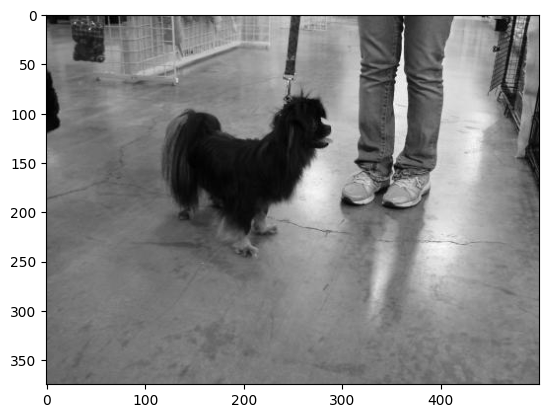

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!


In [10]:
print(img_array)
print(img_array.shape)


[[  4  10  13 ... 165 163 161]
 [  8  14  17 ... 162 160 158]
 [  8  13  16 ... 160 158 156]
 ...
 [ 97  98 100 ... 115 115 115]
 [ 98  99  99 ... 116 116 116]
 [103 102 101 ... 112 112 112]]
(375, 500)


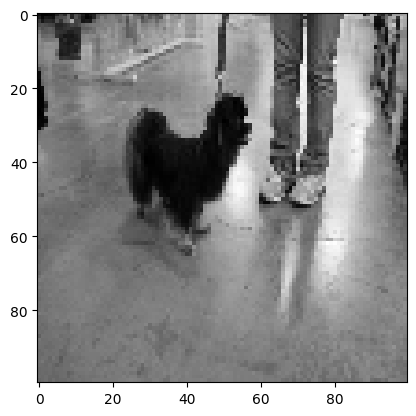

In [11]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

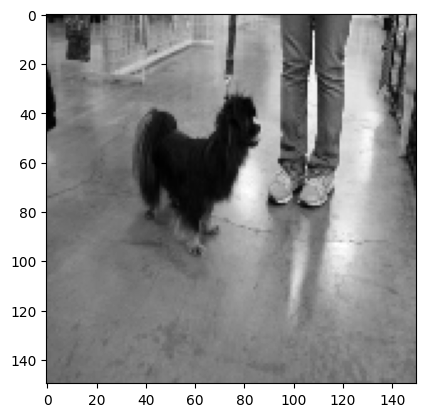

In [14]:
IMG_SIZE = 150
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [4]:
training_data = []
IMG_SIZE = 150
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12400/12400 [00:23<00:00, 520.25it/s]

24744


In [5]:
import random

random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
0
1
0
0
1
1


In [6]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
# X, y = [features for features, label in training_data], [label for features, label in training_data]
# X,y = zip(*training_data)
# X[0]

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# print(X.shape)
# print(X[0][0][0])


In [7]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [34]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)